**Analysis of the relationship between passing accuracy and shots on goal**

In [1]:
import json
from collections import Counter
import numpy as np
import operator
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd
import networkx as nx
import base64
from collections import defaultdict
import sys,os
import math
import random
import operator
import csv
import matplotlib.pylab as pyl
import itertools
import scipy as sp
from scipy import stats
from scipy import optimize
from scipy.integrate import quad

import warnings
warnings.filterwarnings('ignore')

**Loading Raw Data** 

In [3]:
# loading the events data
events={}
nations = ['Italy','England','Germany','France','Spain','European_Championship','World_Cup']
for nation in nations:
    with open('./events/events_%s.json' %nation) as json_data:
        events[nation] = json.load(json_data)
        
# loading the match data
matches={}
nations = ['Italy','England','Germany','France','Spain','European_Championship','World_Cup']
for nation in nations:
    with open('./Matches/matches_%s.json' %nation) as json_data:
        matches[nation] = json.load(json_data)

# loading the players data
players={}
with open('./players.json') as json_data:
    players = json.load(json_data)

# loading the competitions data
competitions={}
with open('./competitions.json') as json_data:
    competitions = json.load(json_data)

**Shots vs Passing accuracy function**

In [5]:
def accuracy_vs_shotplot(country):
    matches_eng=pd.DataFrame.from_dict(matches[country])
    events_eng=pd.DataFrame.from_dict(events[country])

    passes_eng=np.empty([2*(matches_eng['wyId'].shape[0]),1])
    shots_eng=np.empty([2*(matches_eng['wyId'].shape[0]),1])
    accurate_pass_percentage_eng=[]
    shots_eng2=[]

    for i in range((matches_eng['wyId'].shape[0]-1)):
        winner_passes_from_match=events_eng[(events_eng['matchId']==matches_eng['wyId'][i]) & (events_eng['eventName']=='Pass') & (events_eng['teamId']==matches_eng['winner'][i])]
        loser_passes_from_match=events_eng[(events_eng['matchId']==matches_eng['wyId'][i]) & (events_eng['eventName']=='Pass') & (events_eng['teamId']!=matches_eng['winner'][i])]
        winner_shots=events_eng[(events_eng['matchId']==matches_eng['wyId'][i]) & (events_eng['eventName']=='Shot') & (events_eng['teamId']==matches_eng['winner'][i])]
        loser_shots=events_eng[(events_eng['matchId']==matches_eng['wyId'][i]) & (events_eng['eventName']=='Shot') & (events_eng['teamId']!=matches_eng['winner'][i])]

        count_winner=0
        for j in range(winner_passes_from_match.shape[0]-1):
            if winner_passes_from_match[['tags']].iloc[j][0][0]['id']!=1801:
                count_winner=count_winner+1

        count_loser=0
        for j in range(loser_passes_from_match.shape[0]-1):
            if loser_passes_from_match[['tags']].iloc[j][0][0]['id']!=1801:
                count_loser=count_loser+1



        passes_eng[2*i]=winner_passes_from_match.shape[0] 
        passes_eng[2*i+1]=loser_passes_from_match.shape[0]
        shots_eng[2*i]=winner_shots.shape[0]
        shots_eng[2*i+1]=loser_shots.shape[0]

        if winner_passes_from_match.shape[0]>0:
            accurate_pass_percentage_eng.append((float(winner_passes_from_match.shape[0])-count_winner)*100/float(winner_passes_from_match.shape[0]))
            shots_eng2.append(winner_shots.shape[0])

        if loser_passes_from_match.shape[0]>0:
            accurate_pass_percentage_eng.append((float(loser_passes_from_match.shape[0])-count_loser)*100/float(loser_passes_from_match.shape[0]))
            shots_eng2.append(loser_shots.shape[0])


    plt.scatter(accurate_pass_percentage_eng, shots_eng2)
    plt.xlabel('Pass completion percentage')
    plt.ylabel('Shots at goal')

**Shots at goal vs Passing accuracy in the four major leagues**

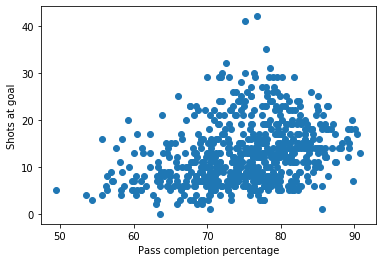

In [7]:
accuracy_vs_shotplot('England')

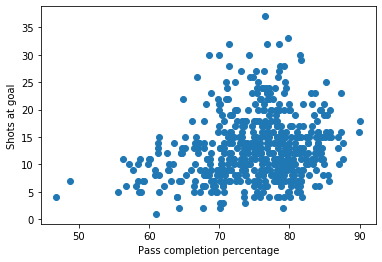

In [6]:
accuracy_vs_shotplot('Germany')

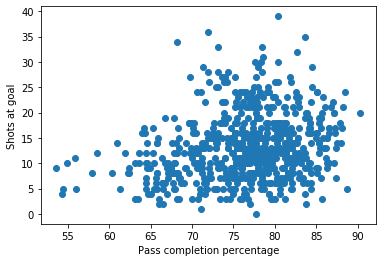

In [8]:
accuracy_vs_shotplot('Italy')

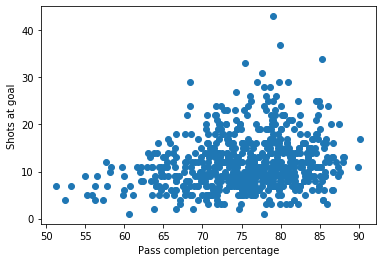

In [9]:
accuracy_vs_shotplot('Spain')

**Across the four major leagues, there is surprisingly not much of a correlation between passing accuracy and shots at goal. A reason for this could be because our analysis is agnostic to the location of passes. Passing accuracy closer to goal may be a better indicator of shots at goal.**

Resources:

Pappalardo, L., Cintia, P., Rossi, A. et al. A public data set of spatio-temporal match events in soccer competitions. Sci Data 6, 236 (2019) doi:10.1038/s41597-019-0247-7, https://www.nature.com/articles/s41597-019-0247-7

Pappalardo, L., Cintia, P., Ferragina, P., Massucco, E., Pedreschi, D., Giannotti, F. (2019) PlayeRank: Data-driven Performance Evaluation and Player Ranking in Soccer via a Machine Learning Approach. ACM Transactions on Intellingent Systems and Technologies 10(5) Article 59, DOI: https://doi.org/10.1145/3343172, https://dl.acm.org/citation.cfm?id=3343172
and the data collection on figshare:

Pappalardo, Luca; Massucco, Emanuele (2019): Soccer match event dataset. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4415000